In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
import seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [3]:
df.dropna(subset=['SIO2'])

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2167,-69.2125,0.01,2.6,12.80,...,73.0,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0.79,NaN
3057,AJO017,NaN,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",NaN,-18.2458,-69.2194,0.01,NaN,NaN,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN


In [4]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,...,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,...,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,...,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,...,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,...,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,...,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,...,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1928,-69.2434,0.01,igneous,volcanic,felsic,rhyodacite,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1929,-69.2433,0.01,igneous,volcanic,felsic,rhyodacite,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,...,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


In [5]:
# Variables we are interested in ( except long/lat)
cluster_variables = ['TIO2', 'AL2O3', 'FEOT','MGO',
       'CAO','P2O5','SR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

data_all = df.dropna()
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
X = data_all[cluster_variables]


coordinates # has coordinates
X # has all other variables 

,TIO2,AL2O3,FEOT,MGO,CAO,P2O5,SR
0,0.565,14.590,4.261,1.111,3.544,0.162,190.0
1,0.796,16.427,5.973,1.732,5.136,0.252,294.0
2,0.340,13.794,4.671,0.310,1.771,0.070,138.0
3,0.688,14.039,4.367,0.638,2.154,0.150,161.0
4,0.531,14.150,5.167,0.471,2.213,0.120,197.0
...,...,...,...,...,...,...,...
3055,0.205,13.303,1.201,0.185,0.893,0.051,157.0
3056,0.274,13.367,1.418,0.478,1.078,0.030,512.6
3057,0.258,13.388,1.419,0.381,1.051,0.041,147.0
3061,0.555,17.025,3.542,0.807,3.845,0.182,508.0


# Choosing Classifier


In [6]:
from sklearn.model_selection import train_test_split

X = data_all[cluster_variables]
X

,TIO2,AL2O3,FEOT,MGO,CAO,P2O5,SR
0,0.565,14.590,4.261,1.111,3.544,0.162,190.0
1,0.796,16.427,5.973,1.732,5.136,0.252,294.0
2,0.340,13.794,4.671,0.310,1.771,0.070,138.0
3,0.688,14.039,4.367,0.638,2.154,0.150,161.0
4,0.531,14.150,5.167,0.471,2.213,0.120,197.0
...,...,...,...,...,...,...,...
3055,0.205,13.303,1.201,0.185,0.893,0.051,157.0
3056,0.274,13.367,1.418,0.478,1.078,0.030,512.6
3057,0.258,13.388,1.419,0.381,1.051,0.041,147.0
3061,0.555,17.025,3.542,0.807,3.845,0.182,508.0


In [7]:
# y (long/lat values)
# Using the Haversine formula to combine long lat into a single value 
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d


In [8]:
import pandas as pd

y = data_all.loc[:,['LONGITUDE','LATITUDE']]
pd.DataFrame([[45.0, 120.0], [60.0, 30.0]], columns=['x', 'y'])

y['harvesine_distance'] = [single_pt_haversine(LONGITUDE, LATITUDE) for LONGITUDE, LATITUDE in zip(y.LONGITUDE, y.LATITUDE)]
y

# Now we have a single value for Lat/Long 

,LONGITUDE,LATITUDE,harvesine_distance
0,-72.4930,-41.1000,8550.645364
1,-72.4930,-41.1000,8550.645364
2,-72.2060,-40.5088,8513.612479
3,-72.1812,-40.5275,8511.985081
4,-72.1743,-40.5675,8512.324318
...,...,...,...
3055,-69.2194,-18.2458,7817.970784
3056,-69.2125,-18.2167,7816.865595
3057,-69.2194,-18.2458,7817.970784
3061,-69.2431,-18.3014,7821.185724


In [9]:
y_new = y['harvesine_distance']
y_new 

0       8550.645364
1       8550.645364
2       8513.612479
3       8511.985081
4       8512.324318
           ...     
3055    7817.970784
3056    7816.865595
3057    7817.970784
3061    7821.185724
3062    7831.939508
Name: harvesine_distance, Length: 1161, dtype: float64

In [10]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(X,y['harvesine_distance'],test_size=0.2, random_state=42,)

In [11]:
print('Labels counts in y:', np.bincount(y['harvesine_distance']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [0 0 0 ... 0 0 3]
Labels counts in y_train: [0 0 0 ... 0 0 2]
Labels counts in y_test: [0 0 0 ... 0 0 1]


In [12]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
# Principal Component Analysis

pca = PCA()
principalComponents = pca.fit_transform(X_train)
len(principalComponents)

928

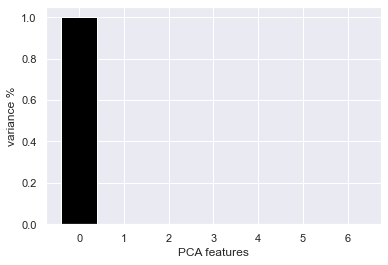

In [14]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

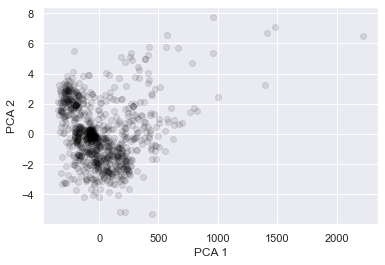

In [15]:
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Shows a single massive cluster

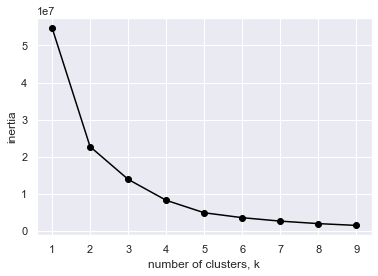

In [16]:
# Finding Clusters: Kmeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Our elbow point seens to be at 2 or at 3. I will be choosing 3 clusters moving forward. 

In [17]:
# Kmeans on our scaled data using 4 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components


,0,1,2,3,4,5,6
0,165.147551,-2.750878,-0.154033,0.164100,-0.246262,-0.021289,0.046459
1,122.140726,-1.051768,-0.254739,-0.182252,-0.500567,0.031123,0.079062
2,235.144960,-2.098573,0.535322,0.687363,0.502484,-0.082630,-0.052591
3,-78.862175,-1.109439,0.772851,-0.263720,-0.282710,-0.225044,-0.024931
4,191.142781,-1.238509,-0.459792,0.811855,0.083284,0.085231,-0.024534
...,...,...,...,...,...,...,...
923,552.137955,0.172229,1.065067,0.106467,0.273584,-0.258971,0.037062
924,-61.865726,0.240045,-0.034876,0.348369,-0.016966,-0.083342,0.023923
925,207.142905,-1.512222,-0.096560,-0.268425,-0.315934,0.034352,0.080337
926,95.142694,-1.631318,0.073109,0.720776,0.184633,0.033637,-0.053795


In [18]:
# Labeling the clusters
model.labels_

array([2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,

In [19]:
# Cluster centers
model.cluster_centers_

array([[ 5.86734377e+02,  1.63225187e+00,  2.28865605e-01,
        -1.64965367e-01, -4.02863344e-02, -2.04818357e-02,
         1.12417681e-03],
       [-1.43386728e+02,  2.46493176e-01,  5.64760652e-02,
        -4.78783609e-02, -1.82572745e-02, -1.16614235e-02,
         6.13516264e-04],
       [ 1.48279563e+02, -8.53870196e-01, -1.62724959e-01,
         1.31361712e-01,  4.49615182e-02,  2.75274020e-02,
        -1.45880913e-03]])

Text(0, 0.5, 'PCA 2')

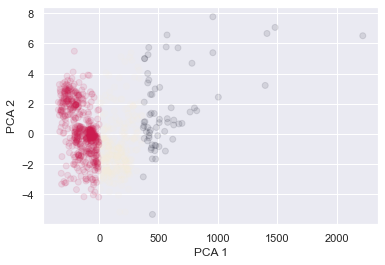

In [20]:
# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')

# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=model.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [21]:
X.head()

,TIO2,AL2O3,FEOT,MGO,CAO,P2O5,SR
0,0.565,14.590,4.261,1.111,3.544,0.162,190.0
1,0.796,16.427,5.973,1.732,5.136,0.252,294.0
2,0.340,13.794,4.671,0.310,1.771,0.070,138.0
3,0.688,14.039,4.367,0.638,2.154,0.150,161.0
4,0.531,14.150,5.167,0.471,2.213,0.120,197.0


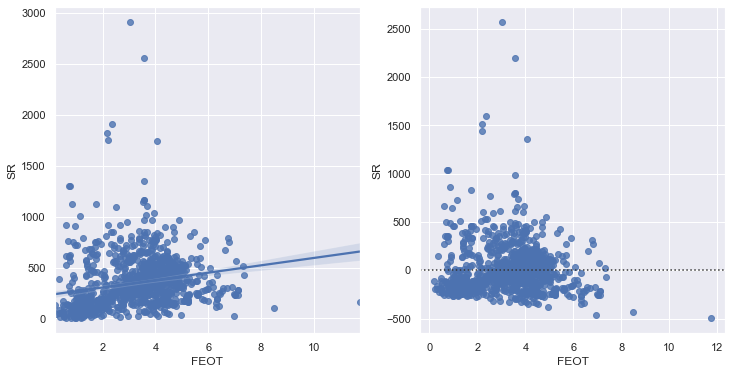

In [22]:
# Linear Regression on Elements 

# Linear Regression FEOT vs. ZR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='FEOT',y='SR',ax=ax0)
sns.residplot(data=X,x='FEOT',y='SR',ax=ax1)
plt.show()

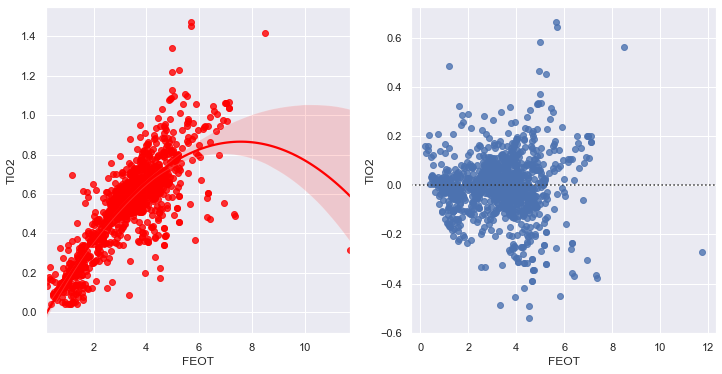

In [23]:
# Polynomial regression FeoT vs. SR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='FEOT',y='TIO2',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='FEOT',y='TIO2',order=2,ax=ax1)
plt.show()

In [24]:
PCA_components


,0,1,2,3,4,5,6
0,165.147551,-2.750878,-0.154033,0.164100,-0.246262,-0.021289,0.046459
1,122.140726,-1.051768,-0.254739,-0.182252,-0.500567,0.031123,0.079062
2,235.144960,-2.098573,0.535322,0.687363,0.502484,-0.082630,-0.052591
3,-78.862175,-1.109439,0.772851,-0.263720,-0.282710,-0.225044,-0.024931
4,191.142781,-1.238509,-0.459792,0.811855,0.083284,0.085231,-0.024534
...,...,...,...,...,...,...,...
923,552.137955,0.172229,1.065067,0.106467,0.273584,-0.258971,0.037062
924,-61.865726,0.240045,-0.034876,0.348369,-0.016966,-0.083342,0.023923
925,207.142905,-1.512222,-0.096560,-0.268425,-0.315934,0.034352,0.080337
926,95.142694,-1.631318,0.073109,0.720776,0.184633,0.033637,-0.053795


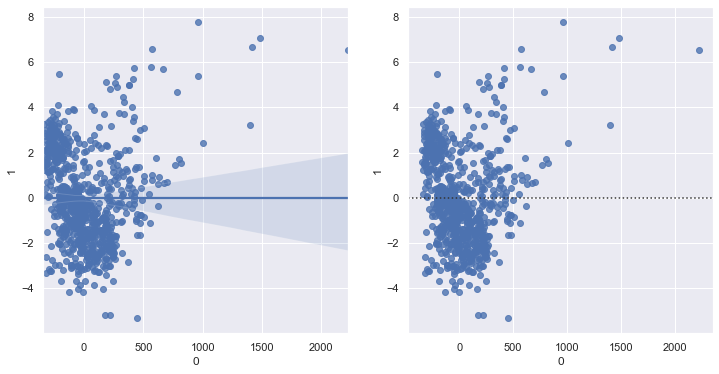

In [25]:
# Polynomial regression PCA 0 vs. PCA 1
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(x= PCA_components[0],y=PCA_components[1],order=1,ax=ax0)
sns.residplot(x= PCA_components[0],y=PCA_components[1],order=1,ax=ax1)
plt.show()

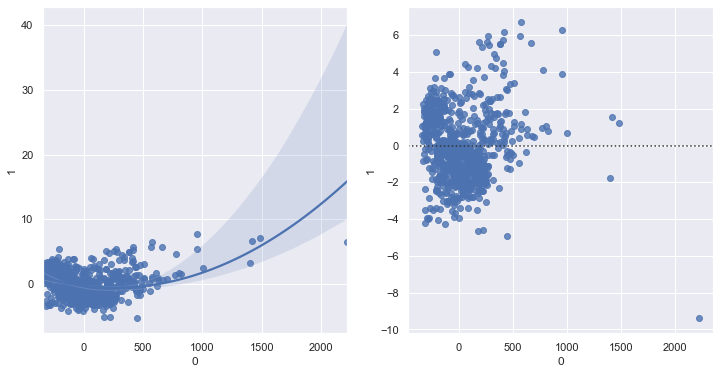

In [26]:
# Polynomial regression PCA 0 vs. PCA 1
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(x= PCA_components[0],y=PCA_components[1],order=2,ax=ax0)
sns.residplot(x= PCA_components[0],y=PCA_components[1],order=2,ax=ax1)
plt.show()

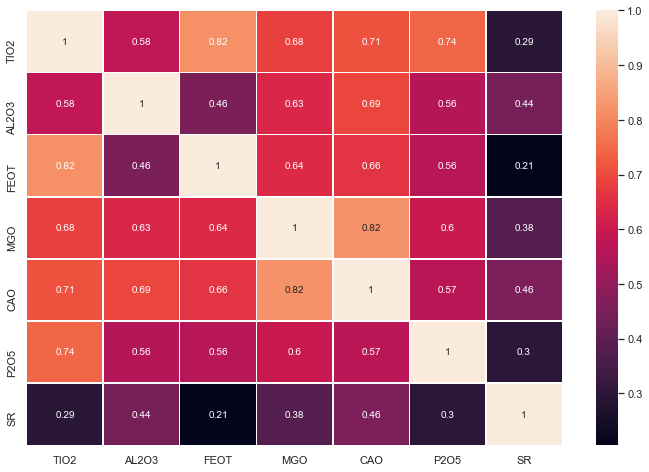

In [27]:
# Heatmap on correlation
fig,ax = plt.subplots()
fig.set_size_inches([12,8])
sns.heatmap(X.corr(),annot=True,linewidths = 0.5)
plt.show()

In [28]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (928, 7)
Training Labels Shape: (928,)
Testing Features Shape: (233, 7)
Testing Labels Shape: (233,)


In [35]:
# Random Forest

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 141.53 degrees.
Accuracy: 98.24 %.


In [39]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / X_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 3      NaN
14     NaN
39     NaN
50     NaN
51     NaN
        ..
FEOT   NaN
MGO    NaN
P2O5   NaN
SR     NaN
TIO2   NaN
Length: 240, dtype: float64 %.


In [47]:
X_train

,TIO2,AL2O3,FEOT,MGO,CAO,P2O5,SR
2220,0.825,16.913,4.918,1.959,4.950,0.309,508.0
2366,0.596,16.308,3.894,1.112,3.731,0.263,465.0
2449,0.885,15.983,4.815,2.645,4.771,0.244,578.0
1051,0.858,15.137,4.371,1.010,2.908,0.232,264.0
1687,0.582,16.157,3.549,2.037,4.566,0.171,534.0
...,...,...,...,...,...,...,...
2831,0.934,15.656,4.370,2.012,3.932,0.359,895.0
2973,0.537,14.814,2.774,1.077,2.669,0.198,281.0
3012,0.670,16.647,4.412,1.492,4.070,0.294,550.0
2447,0.672,15.763,4.059,2.077,4.338,0.163,438.0


In [50]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = ['FEOT','MGO']
train_important = X_train[important_indices]
test_important = X_test[important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 204.33 degrees.
Accuracy: 97.46 %.


In [54]:
# Plotting the tree
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

ModuleNotFoundError: No module named 'pydot'